<a href="https://colab.research.google.com/github/Kanchan786786/Capstone_project-/blob/main/LSTM_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Kanchan786786/Capstone_project-.git

Cloning into 'Capstone_project-'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 87 (delta 40), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 3.91 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
!pip install geopandas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/main/aapl_scaled.csv"
df = pd.read_csv(url)

In [ ]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6307 non-null   object 
 1   Day             6307 non-null   int64  
 2   Close           6307 non-null   float64
 3   High            6307 non-null   float64
 4   Low             6307 non-null   float64
 5   Open            6307 non-null   float64
 6   Volume          6307 non-null   float64
 7   VWAP            6307 non-null   float64
 8   Adjusted_Close  6307 non-null   float64
 9   Market_Cap      6307 non-null   float64
 10  Bid_Date        6307 non-null   float64
 11  Ask_Date        6307 non-null   float64
 12  SMA_50          6307 non-null   float64
 13  EMA_50          6307 non-null   float64
 14  RSI             6307 non-null   float64
 15  MACD            6307 non-null   float64
 16  MACD_Signal     6307 non-null   float64
 17  MACD_Hist 

In [ ]:
df.head()

,Date,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow
0,2000-01-03,1,-0.671968,-0.672324,-0.672963,-0.673016,0.393194,-0.672426,-0.671968,0.0,-2.842171e-14,-5.684342e-14,-0.673419,-0.673757,0.741042,-0.182205,-0.196298,0.005582,-0.673222
1,2000-01-04,3,-0.673132,-0.672551,-0.673029,-0.672605,0.332136,-0.672918,-0.673132,0.0,-2.842171e-14,-5.684342e-14,-0.673335,-0.673723,-0.186780,-0.182942,-0.196298,0.003174,-0.673042
2,2000-01-05,4,-0.672952,-0.672551,-0.672797,-0.673163,1.025500,-0.672787,-0.672952,0.0,-2.842171e-14,-5.684342e-14,-0.673268,-0.673673,-0.073428,-0.182942,-0.196298,0.003174,-0.674139
3,2000-01-06,2,-0.674050,-0.672989,-0.673791,-0.672868,0.998519,-0.673623,-0.674050,0.0,-2.842171e-14,-5.684342e-14,-0.673218,-0.673673,-0.766005,-0.187362,-0.197871,-0.006458,-0.673599
4,2000-01-07,0,-0.673509,-0.673720,-0.673742,-0.674049,0.197493,-0.673673,-0.673509,0.0,-2.842171e-14,-5.684342e-14,-0.673167,-0.673656,-0.416792,-0.188835,-0.198657,-0.008866,-0.673812


In [ ]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

print(df.head())


         Date  Day     Close      High       Low      Open    Volume  \
0  2000-01-03    1 -0.671968 -0.672324 -0.672963 -0.673016  0.393194   
1  2000-01-04    3 -0.673132 -0.672551 -0.673029 -0.672605  0.332136   
2  2000-01-05    4 -0.672952 -0.672551 -0.672797 -0.673163  1.025500   
3  2000-01-06    2 -0.674050 -0.672989 -0.673791 -0.672868  0.998519   
4  2000-01-07    0 -0.673509 -0.673720 -0.673742 -0.674049  0.197493   

       VWAP  Adjusted_Close  Market_Cap      Bid_Date      Ask_Date    SMA_50  \
0 -0.672426       -0.671968         0.0 -2.842171e-14 -5.684342e-14 -0.673419   
1 -0.672918       -0.673132         0.0 -2.842171e-14 -5.684342e-14 -0.673335   
2 -0.672787       -0.672952         0.0 -2.842171e-14 -5.684342e-14 -0.673268   
3 -0.673623       -0.674050         0.0 -2.842171e-14 -5.684342e-14 -0.673218   
4 -0.673673       -0.673509         0.0 -2.842171e-14 -5.684342e-14 -0.673167   

     EMA_50       RSI      MACD  MACD_Signal  MACD_Hist  Tomorrow  
0 -0.673757 

In [ ]:


# Strategy 1: Numerical Columns (e.g., prices)
# For numerical columns, we can use imputation methods like mean, median, or mode.
# We'll use the mean for demonstration.  You might choose median if there are outliers.

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():  # Check if the column actually has missing values
        df[col] = df[col].fillna(df[col].mean()) #Fill with mean


# Strategy 2: Categorical Columns (if any)
# For categorical columns, we can use the mode (most frequent value)
#  or a special value like 'Unknown'.

categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
  if df[col].isnull().any(): #check if the column has any null values
    df[col] = df[col].fillna(df[col].mode()[0])


#Verify if there are any null values left
print("\nMissing Values After Handling:\n")
print(df.isnull().sum())



Missing Values After Handling:

Date              0
Day               0
Close             0
High              0
Low               0
Open              0
Volume            0
VWAP              0
Adjusted_Close    0
Market_Cap        0
Bid_Date          0
Ask_Date          0
SMA_50            0
EMA_50            0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
Tomorrow          0
dtype: int64


In [ ]:

import pandas as pd
import numpy as np
# Display data types of each column
df.dtypes


,0
Date,object
Day,int64
Close,float64
High,float64
Low,float64
Open,float64
Volume,float64
VWAP,float64
Adjusted_Close,float64
Market_Cap,float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Close', 'Tomorrow', 'Low', 'Open', 'Volume', 'VWAP', 'Adjusted_Close', 'Market_Cap', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = 'High'

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features + [target]]), columns=features + [target], index=df.index)

# Prepare sequences for LSTM
def create_sequences(data, feature_cols, target_col, time_steps=60):
    np.random.seed(42)
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
X, y = create_sequences(df_scaled, features, target, time_steps)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions.reshape(-1, 1)), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0012 - val_loss: 0.0269
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 1.2648e-04 - val_loss: 0.0221
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - loss: 7.4014e-05 - val_loss: 0.0143
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - loss: 5.5049e-05 - val_loss: 0.0115
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - loss: 5.3404e-05 - val_loss: 0.0066
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - loss: 4.3659e-05 - val_loss: 0.0144
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 6.4222e-05 - val_loss: 0.0082
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - loss: 4.0814e-05 - val_loss: 0.0048
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 3.9089e-05 - val_loss: 0.0066
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 3.3630e-05 - val_loss: 0.0055
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 3.4495e-05 - val_los

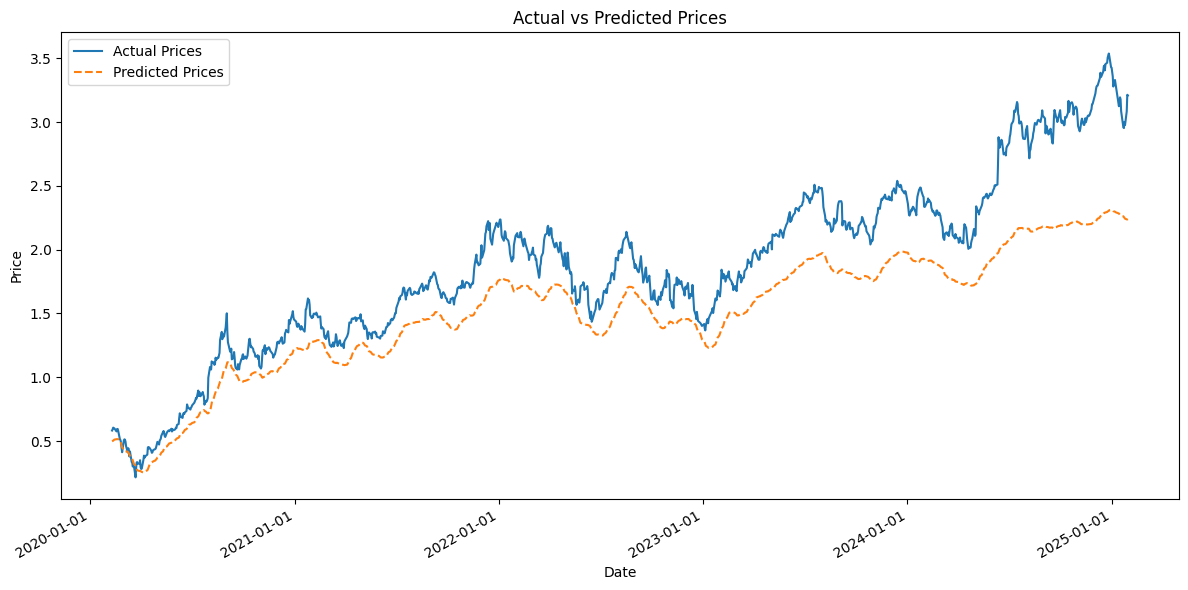

In [ ]:
# prompt: plot a graph little clear with the advance and clear details , x axis dates should be claer like it shiuld not over lap

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ... (Your existing code)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'].iloc[-len(y_test):], y_test_inv, label="Actual Prices")
plt.plot(df['Date'].iloc[-len(y_test):], predictions_inv, label="Predicted Prices", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices")

# Format the x-axis for better date display
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Customize the date format as needed
plt.gcf().autofmt_xdate() # Rotate date labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:


import pandas as pd
import numpy as np
# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions_inv)

# Create a table of evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Value': [mse, rmse, r2]
})

print("\nEvaluation Metrics:\n")
evaluation_metrics



Evaluation Metrics:



,Metric,Value
0,Mean Squared Error (MSE),0.182732
1,Root Mean Squared Error (RMSE),0.427472
2,R-squared (R2),0.606956


In [ ]:
# prompt: calculate the training accuracy and testing accuracy

import numpy as np
# Evaluate the model on the training data
train_predictions = model.predict(X_train)
train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions.reshape(-1, 1)), axis=1))[:, -1]
y_train_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]

train_mse = mean_squared_error(y_train_inv, train_predictions_inv)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_inv, train_predictions_inv)

print(f"Training Accuracy (R-squared): {train_r2}")
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")

print(f"Testing Accuracy (R-squared): {r2}")
print(f"Testing MSE: {mse}")
print(f"Testing RMSE: {rmse}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Training Accuracy (R-squared): 0.9960360728026366
Training MSE: 0.0002713069911917976
Training RMSE: 0.016471399187433882
Testing Accuracy (R-squared): 0.6069560347676266
Testing MSE: 0.18273202952713136
Testing RMSE: 0.42747167102292444


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Close', 'Tomorrow', 'Low', 'Open', 'Volume', 'VWAP', 'Adjusted_Close', 'Market_Cap', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = 'High'

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features + [target]]), columns=features + [target], index=df.index)

# Prepare sequences for LSTM
def create_sequences(data, feature_cols, target_col, time_steps=60):
    np.random.seed(42)
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
X, y = create_sequences(df_scaled, features, target, time_steps)

# Split into training and testing sets (80% train, 20% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Build the LSTM model
model_2 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X2_train.shape[1], X2_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model_2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_2.fit(X2_train, y2_train, epochs=40, batch_size=32, validation_data=(X2_test, y2_test))

# Make predictions
predictions = model_2.predict(X2_test)

# Inverse transform the predictions to the original scale
predictions2_inv = scaler.inverse_transform(np.concatenate((X2_test[:, -1, :], predictions.reshape(-1, 1)), axis=1))[:, -1]
y2_test_inv = scaler.inverse_transform(np.concatenate((X2_test[:, -1, :], y2_test.reshape(-1, 1)), axis=1))[:, -1]



Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - loss: 0.0014 - val_loss: 0.0390
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 1.2204e-04 - val_loss: 0.0234
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 8.6693e-05 - val_loss: 0.0293
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 6.5695e-05 - val_loss: 0.0297
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 5.5695e-05 - val_loss: 0.0315
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 5.2535e-05 - val_loss: 0.0222
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 4.8815e-05 - val_loss: 0.0193
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - loss: 4.5618e-05 - val_loss: 0.0249
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 6.1912e-05 - val_loss: 0.0341
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 4.7181e-05 - val_loss: 0.0260
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 3.4316e-05 - val_loss: 0.0236
E

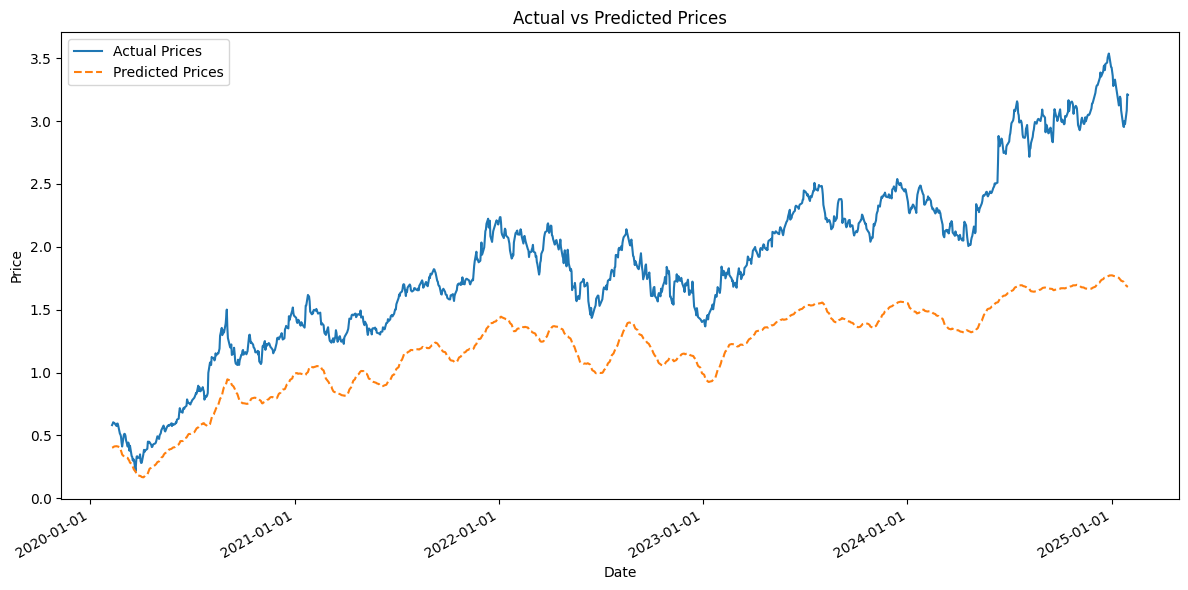

In [ ]:
# prompt: plot a graph little clear with the advance and clear details , x axis dates should be claer like it shiuld not over lap

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ... (Your existing code)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'].iloc[-len(y2_test):], y2_test_inv, label="Actual Prices")
plt.plot(df['Date'].iloc[-len(y2_test):], predictions2_inv, label="Predicted Prices", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices")

# Format the x-axis for better date display
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Customize the date format as needed
plt.gcf().autofmt_xdate() # Rotate date labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:

import pandas as pd
import numpy as np
# Calculate evaluation metrics
mse_2 = mean_squared_error(y2_test_inv, predictions2_inv)
rmse_2 = np.sqrt(mse)
r2_2 = r2_score(y2_test_inv, predictions2_inv)

# Create a table of evaluation metrics
evaluation_metrics_2 = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Value': [mse_2, rmse_2, r2_2]
})

print("\nEvaluation Metrics:\n")
evaluation_metrics_2



Evaluation Metrics:



,Metric,Value
0,Mean Squared Error (MSE),0.571223
1,Root Mean Squared Error (RMSE),0.427472
2,R-squared (R2),-0.228661


In [ ]:
import numpy as np
# Evaluate the model on the training data
train2_predictions = model_2.predict(X2_train)
train2_predictions_inv = scaler.inverse_transform(np.concatenate((X2_train[:, -1, :], train2_predictions.reshape(-1, 1)), axis=1))[:, -1]
y2_train_inv = scaler.inverse_transform(np.concatenate((X2_train[:, -1, :], y2_train.reshape(-1, 1)), axis=1))[:, -1]

train2_mse = mean_squared_error(y2_train_inv, train2_predictions_inv)
train2_rmse = np.sqrt(train2_mse)
train2_r2 = r2_score(y2_train_inv, train2_predictions_inv)

print(f"Training Accuracy (R-squared): {train2_r2}")
print(f"Training MSE: {train2_mse}")
print(f"Training RMSE: {train2_rmse}")

print(f"Testing Accuracy (R-squared): {r2_2}")
print(f"Testing MSE: {mse_2}")
print(f"Testing RMSE: {rmse_2}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Training Accuracy (R-squared): 0.982604085765562
Training MSE: 0.0011906457699614543
Training RMSE: 0.03450573531981972
Testing Accuracy (R-squared): -0.2286611167205168
Testing MSE: 0.5712229656717275
Testing RMSE: 0.42747167102292444


In [ ]:
pip install scikeras


In [ ]:
from scikeras.wrappers import KerasRegressor


In [ ]:
from scikeras.wrappers import KerasRegressor


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

# Define the model function for tuning
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('units1', min_value=50, max_value=200, step=50), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        LSTM(hp.Int('units2', min_value=50, max_value=200, step=50), return_sequences=False),
        Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])),
        Dense(25, activation=hp.Choice('activation', ['relu', 'tanh'])),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='lstm_tuner',
    project_name='stock_prediction'
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
best_model.evaluate(X_test, y_test)


Trial 10 Complete [00h 12m 46s]
val_loss: 0.0006293437909334898

Best val_loss So Far: 0.0004319399013184011
Total elapsed time: 02h 07m 58s
Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 300ms/step - loss: 0.0021 - val_loss: 0.0102
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 289ms/step - loss: 6.8914e-05 - val_loss: 0.0168
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 305ms/step - loss: 5.4129e-05 - val_loss: 0.0096
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - loss: 4.1827e-05 - val_loss: 0.0088
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - loss: 3.8406e-05 - val_loss: 0.0102
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - loss: 3.5048e-05 - val_loss: 0.0037
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 302ms/step - loss: 3.1426e-05 - val_loss: 0.0081
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 298ms/step - loss: 2.6825e-05 - val_loss: 0.0035
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 305ms/step - loss: 2.4326e-05 - val_loss: 0.0092
Epoch 10/50
157/157 ━━━━━━

0.002723309677094221

In [ ]:
best_hps.values

{'units1': 200, 'dropout_rate': 0.2, 'units2': 150, 'activation': 'relu'}

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step

Evaluation Metrics for Best Model:

                           Metric     Value
0        Mean Squared Error (MSE)  0.048495
1  Root Mean Squared Error (RMSE)  0.220216
2                  R-squared (R2)  0.895690
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step

Best Model - Training Accuracy (R-squared): 0.9858527917033407
Best Model - Training MSE: 0.0009682913750997311
Best Model - Training RMSE: 0.03111738059509076

Best Model - Testing Accuracy (R-squared): 0.8956900590867951
Best Model - Testing MSE: 0.048495254701738225
Best Model - Testing RMSE: 0.2202163815471915


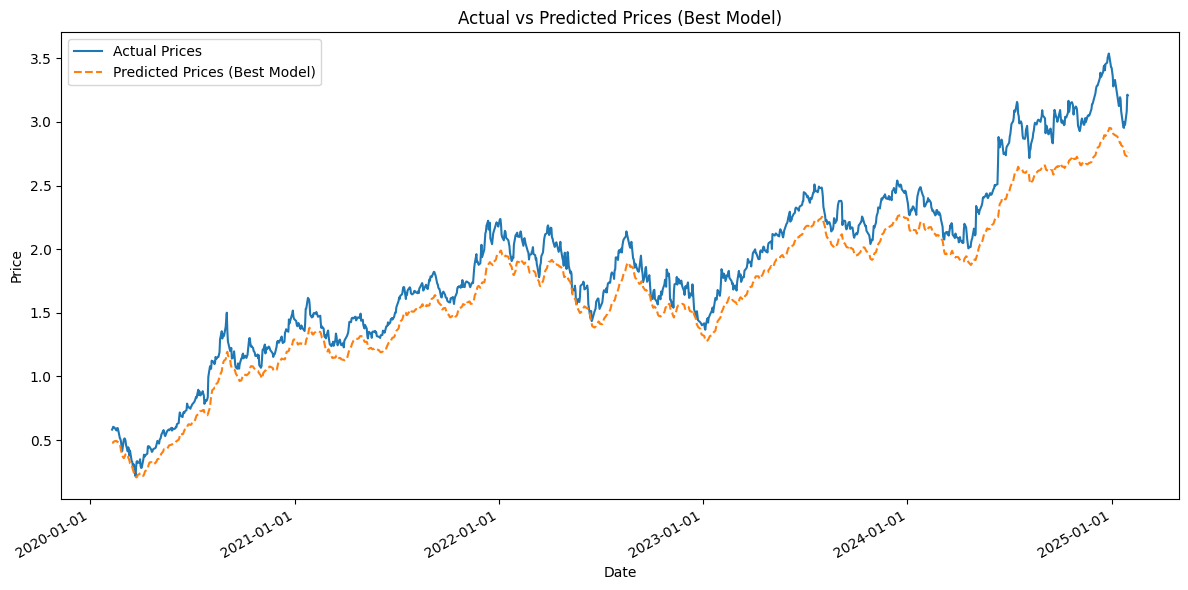

In [ ]:
# prompt: generate the code the error metric just like model2 for my best model as well

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Inverse transform the predictions to the original scale
best_predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], best_predictions.reshape(-1, 1)), axis=1))[:, -1]

# Calculate evaluation metrics for the best model
best_mse = mean_squared_error(y_test_inv, best_predictions_inv)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test_inv, best_predictions_inv)

# Create a table of evaluation metrics for the best model
best_evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Value': [best_mse, best_rmse, best_r2]
})

print("\nEvaluation Metrics for Best Model:\n")
print(best_evaluation_metrics)

# Evaluate the best model on the training data
best_train_predictions = best_model.predict(X_train)
best_train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], best_train_predictions.reshape(-1, 1)), axis=1))[:, -1]

best_train_mse = mean_squared_error(y_train_inv, best_train_predictions_inv)
best_train_rmse = np.sqrt(best_train_mse)
best_train_r2 = r2_score(y_train_inv, best_train_predictions_inv)

print(f"\nBest Model - Training Accuracy (R-squared): {best_train_r2}")
print(f"Best Model - Training MSE: {best_train_mse}")
print(f"Best Model - Training RMSE: {best_train_rmse}")

print(f"\nBest Model - Testing Accuracy (R-squared): {best_r2}")
print(f"Best Model - Testing MSE: {best_mse}")
print(f"Best Model - Testing RMSE: {best_rmse}")

#Plot for the best model
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test_inv, label="Actual Prices")
plt.plot(df['Date'].iloc[-len(y_test):], best_predictions_inv, label="Predicted Prices (Best Model)", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices (Best Model)")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()



|LSTM Model | Activation Function | No.of Layer| Layer_lstm | Dropout (Y/N)|Training Accuracy | Test Accuracy |No.of epoch|Number of Dropout layer |Droping Rate|Explanation for change | outcome||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Relu | 6 | 50/LSTM_Layer1,50/LSTM_layer2|Y| 0.996 |0.6069 | 20 | 2|0.2 /both layer|it is our base model | base model |
| 2 | Relu | 6 | 50/LSTM_Layer1,50/LSTM_layer2|Y| 0.9826 |-0.2286 |  40| 2|0.2 /both layer|Change in epoch | Accuracy decrease drastically |
| 3 | Relu | 6 | 200/LSTM_Layer1,150/LSTM_layer2|Y| 0.986 | 0.895|  50| 2|0.2 /both layer|Random search | got the best model so far|






In [ ]:
best_hps.values

{'units1': 200, 'dropout_rate': 0.2, 'units2': 150, 'activation': 'relu'}



### Model Explanation:

#### This code builds and trains a Long Short-Term Memory (LSTM) network to predict the 'Target_Variable_-_High'
#### (likely a stock price) based on various features (e.g., closing price, volume, technical indicators).

#### 1. Data Preprocessing:

##### Data is loaded from an Excel file and preprocessed to handle missing values.
##### Features are normalized to the range [0, 1] using MinMaxScaler, which improves the training process.
##### The data is transformed into sequences of past observations, suitable for the LSTM.  The `time_steps` variable (set to 60) indicates the LSTM will look at the past 60 time steps to predict the next one.


### 2. LSTM Model Architecture:

#### The model consists of:

####  Two LSTM layers: LSTM layers are designed to process sequential data, capturing long-term dependencies in the time series.  
####  The first LSTM layer returns its sequences, meaning the output of this layer is still a sequence of vectors. This is importantfor the second LSTM layer. The second LSTM layer does not return sequences.  `return_sequences=False` means it processes the whole sequence of output vectors from the first LSTM layer and outputs a single vector. Each layer has 50 units, which can be thought of as the dimensionality of the internal representation (hidden state) of the LSTM.
####  Dropout layers: Dropout is a regularization technique that randomly drops units during training, helping prevent overfitting.
#### Dense layers: A fully connected layer with 25 neurons, and a final output layer with one neuron to predict the target variable.


### 3. Training and Evaluation:

#### The model is compiled with the Adam optimizer and mean squared error (MSE) loss function. MSE is well suited for regression tasks
#### Training history is saved into the `history` variable.  This lets you plot training loss vs. validation loss.


### 4. What LSTM is doing:
####  LSTM layers are designed to address the vanishing gradient problem, which makes it difficult for traditional recurrent networks to learn long-range dependencies. LSTMs use a clever internal mechanism called gates, (input, output, forget).  These gates control how much of the past information is remembered or forgotten as new data comes in.


### 5. Insights:
####  The R-squared values for the training and test sets reveal how well the model fits the data and how generalizable the model is to unseen data.
####  Comparing the plots of actual vs. predicted values is crucial to assess the model's predictive power.  

### Further Analysis:
#### Examine the training history to detect any overfitting.
#### Experiment with different hyperparameters (e.g., number of LSTM layers, number of units, dropout rates, time steps).

